In [1]:
from datascience import *
import numpy as np
path_data = '../../../../data/'
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Overlaid Graphs ###

In this chapter, we have learned how to visualize data by drawing graphs. A common use of such visualizations is to compare two datasets. In this section, we will see how to *overlay* plots, that is, draw them in a single graphic on a common pair of axes.

For the overlay to make sense, the graphs that are being overlaid must represent the same variables and be measured in the same units. 

To draw overlaid graphs, the methods `scatter`, `plot`, and `barh` can all be called in the same way. For `scatter` and `plot`, one column must serve as the common horizontal axis for all the overlaid graphs. For `barh`, one column must serve as the common axis which is the set of categories. The general call looks like:

`name_of_table.method(column_label_of_common_axis, array_of_labels_of_variables_to_plot)`

More commonly, we will first select only the columns needed for our graph, and then call the method by just specifying the variable on the common axis:

`name_of_table.method(column_label_of_common_axis)`


### Scatter Plots ###

[Franics Galton](https://en.wikipedia.org/wiki/Francis_Galton) (1822-1911) was an English polymath who was a pioneer in the analysis of relations between numerical variables. He was particularly interested in the controversial area of eugenics – indeed, he coined that term – which involves understading how physical traits are passed down from one generation to the next. 

Galton meticulously collected copious amounts of data, some of which we will analyze in this course. Here is a subset of Galton's data on heights of parents and their children. Specifically, the population consists of 179 men who were the first-born in their families. The data are their own heights and the heights of their parents. All heights were measured in inches.

In [2]:
heights = Table.read_table(path_data + 'galton_subset.csv')
heights

father,mother,son
78.5,67,73.2
75.5,66.5,73.5
75,64,71
75,64,70.5
75,58.5,72
74,68,76.5
74,62,74
73,67,71
73,67,68
73,66.5,71


The `scatter` method allows us to visualize how the sons' heights are related to the heights of both their parents. In the graph, the sons' heights will form the common horizontal axis. 

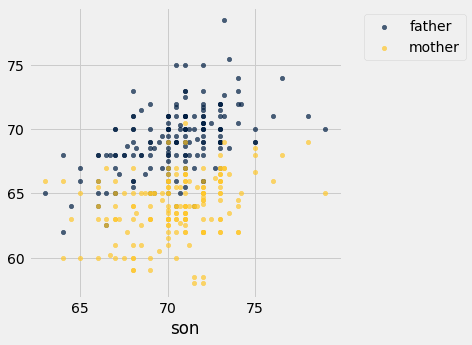

In [3]:
heights.scatter('son')

Notice how we only specified the variable (sons' heights) on the common horizontal axis. Python drew two scatter plots: one each for the relation between this variable and the other two.

Both the gold and the blue scatter plots slope upwards and show a positive association between the sons' heights and the heights of both their parents. The blue (fathers) plot is in general higher than the gold, because the fathers were in general taller than the mothers.

### Line Plots ###

Our next example involves data on children of more recent times. We will return to the Census data table `us_pop`, created below again for reference. From this, we will extract the counts of all children in each of the age categories 0 through 18 years.

In [4]:
# Read the full Census table
census_url = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv'
full_census_table = Table.read_table(census_url)

# Select columns from the full table and relabel some of them
partial_census_table = full_census_table.select(['SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2014'])
us_pop = partial_census_table.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2014', '2014')

# Access the rows corresponding to all children, ages 0-18
children = us_pop.where('SEX', are.equal_to(0)).where('AGE', are.below(19)).drop('SEX')
children.show()

AGE,2010,2014
0,3951330,3949775
1,3957888,3949776
2,4090862,3959664
3,4111920,4007079
4,4077551,4005716
5,4064653,4006900
6,4073013,4135930
7,4043046,4155326
8,4025604,4120903
9,4125415,4108349


We can now draw two overlaid line plots, showing the numbers of children in the different age groups for each of the years 2010 and 2014. The method call is analogous to the `scatter` call in the previous example.

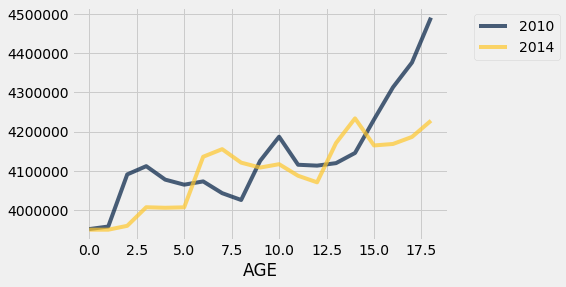

In [5]:
children.plot('AGE')

On this scale, it's important to remember that we only have data at ages 0, 1, 2, and so on; the graphs "join the dots" in between.

The graphs cross each other in a few places: for example, there were more 4-year-olds in 2010 than in 2014, and there were more 14-year-olds in 2014 than in 2010.

Of course, the 14-year-olds in 2014 mostly consist of the 10-year-olds in 2010. To see this, look at the gold graph at `AGE` 14 and the blue graph at `AGE` 10. Indeed, you will notice that the entire gold graph (2014) looks like the blue graph (2010) slid over to the right by 4 years. The slide is accompanied by a slight rise due to the net effect of children who entered the country between 2010 and 2014 outnumbering those who left. Fortunately at these ages there is not much loss of life.

### Bar Charts ###

For our final example of this section, we look at distributions of ethnicities of adults and children in California as well as in the entire United States.

The Kaiser Family Foundation has complied Census data on the distribution of race and ethnicity in the U.S. The Foundation's website provides compilations of data for [the entire U.S. population](http://kff.org/other/state-indicator/distribution-by-raceethnicity/) in 2014, as well as for [U.S. children](http://kff.org/other/state-indicator/children-by-raceethnicity/) who were younger than 18 years old that year.

Here is a table adapted from their data for the United States and California. The columns represent everyone in the U.S.A., everyone in California, children in the U.S.A., and children in California. The body of the table contains proportions in the different categories. Each column shows the distribution of ethnicities in the group of people corresponding to that column. So in each column, the entries add up to 1.

In [6]:
usa_ca = Table.read_table(path_data + 'usa_ca_2014.csv')
usa_ca

Ethnicity,USA All,CA All,USA Children,CA Children
Black,0.12,0.05,0.14,0.05
Hispanic,0.18,0.38,0.24,0.5
White,0.62,0.39,0.52,0.29
Other,0.08,0.18,0.1,0.16


It is natural to want to compare these distributions. It makes sense to compare the columns directly, because all the entries are proportions and are therefore on the same scale.

The method `barh` allows us to visualize the comparisons by drawing multiple bar charts on the same axes. The call is analogous to those for `scatter` and `plot`: we have to specify the common axis of categories. 

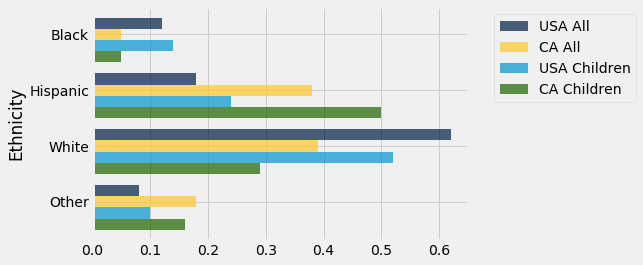

In [7]:
usa_ca.barh('Ethnicity')

While drawing the overlaid bar charts is straightforward, there is a bit too much information on this graph for us to be able to sort out similarities and differences between populations. It seems clear that the distributions of ethnicities for everyone in the U.S. and for children in the U.S. are more similar to each other than any other pair, but it's much easier to compare the populations one pair at a time. 

Let's start by comparing the entire populations of the U.S.A. and California. 

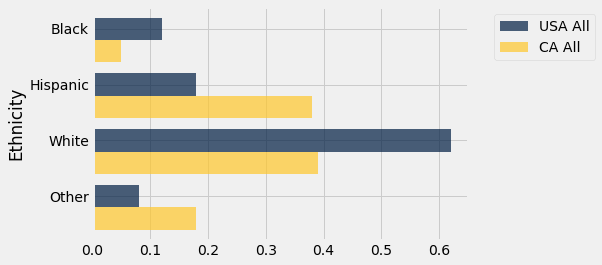

In [8]:
usa_ca.select('Ethnicity', 'USA All', 'CA All').barh('Ethnicity')

The two distributions are quite different. California has higher proportions in the `Hispanic` and `Other` categories, and correspondingly lower proportions of `Black` and `White`. The differences are largely due to California's geographical location and patterns of immigration, both historically and in more recent decades. For example, the `Other` category in California includes a significant proportion of Asians and Pacific Islanders.

As you can see from the graph, almost 40% of the Californian population in 2014 was `Hispanic`. A comparison with the population of children in the state indicates that the `Hispanic` proportion is likely to be greater in future years. Among Californian children, 50% are in the `Hispanic` category.

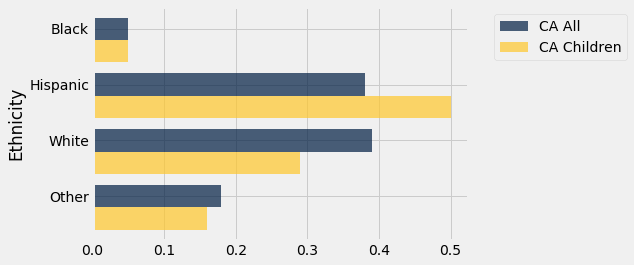

In [9]:
usa_ca.select('Ethnicity', 'CA All', 'CA Children').barh('Ethnicity')

More complex datasets naturally give rise to varied and interesting visualizations, including overlaid graphs of different kinds. To analyze such data, it helps to have some more skills in data manipulation, so that we can get the data into a form that allows us to use methods like those in this section. In the next chapter we will develop some of these skills.